The Binary adder is one of the simplest useful logic getes in classical computing. Classically it is implemented using an XOR and an AND gate.


<img src="Images/CAdder.png" style="height: 150px; width:200px;"/>


The same sort of logic can also be implemented on a quantum computer. The difference is that becuase quantum machanics is unitray all the gates we use have to be reversible, i.e. the input has to be recoverable form the output. AND and XOR are not reverible, but every non-reversible circuit can be made reversible with toffoli gates.
(see nielsen and chuang computer science section)

The quantum binary adder does not use entaglement so it it not faster than te classical binary adder.


In [9]:
from qiskit import * 
from qiskit.tools.visualization import plot_bloch_multivector

## QISKIT can connect to IBM quantum computers over the cloud with the qiskit.provider library but I found that
## job ques usuly take upwards of 30 minutes so I will just use the pre-built quantum simulators (these are also noiseless)
sim_state = Aer.get_backend("statevector_simulator")
sim_count = Aer.get_backend("qasm_simulator")

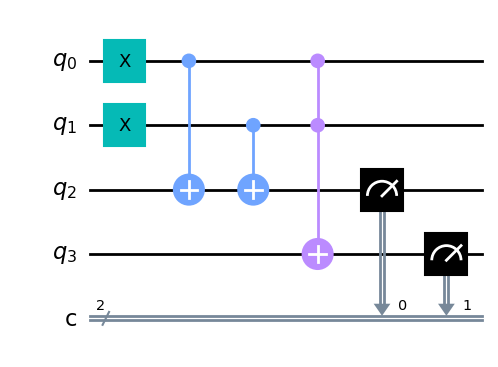

In [10]:
adder = QuantumCircuit(4, 2)
#### Input

# Pauli X gate flips a 0 state to a 1 state
adder.x(0)
adder.x(1)


#### Addet Circuit
adder.cnot(0, 2) # summing 
adder.cnot(1, 2) # summing
adder.toffoli(0, 1, 3) # carry


adder.measure(2, 0) # measure result 
adder.measure(3, 1) # measure carry 

adder.draw(output="mpl")

In [7]:
final_state = execute(adder, backend=sim_state).result().get_statevector()

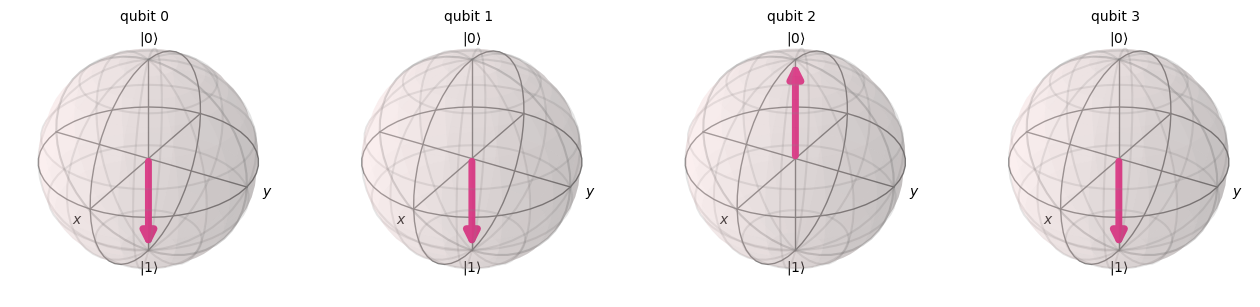

In [8]:
plot_bloch_multivector(final_state) ## 1 + 1 = 0 remaineder 1 